***
# **USED CAR SALES Data Analysis**
***

***FINDING 01 - Data Quality and Preprocessing Insights***

In [52]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from scipy import stats


In [2]:
# Load the CSV into a DataFrame
df = pd.read_csv("used_car_sales.csv")

df.head()


,ID,Distributor Name,Location,Car Name,Manufacturer Name,Car Type,Color,Gearbox,Number of Seats,Number of Doors,...,Purchased Date,Car Sale Status,Sold Date,Purchased Price-$,Sold Price-$,Margin-%,Sales Agent Name,Sales Rating,Sales Commission-$,Feedback
0,O2KE17,Carmudi,California,Fortuner,Toyota,SUV,Gray,Automatic,8.0,5.0,...,2022-10-26,Un Sold,1970-01-01,8296.0,0.0,0,Pranav,1.0,0.0,Average
1,EPMPC8,Carousell,Philadelphia,Creta,Hyundai,Hatchback,Blue,Automatic,5.0,5.0,...,2017-08-25,Sold,2021-03-03,NaN,4770.0,-16,Vihaan,5.0,0.0,Good
2,SQKXAP,Carsome,North Carolina,Scorpio,Mahindra,SUV,Gray,Automatic,5.0,5.0,...,2018-06-13,Un Sold,1970-01-01,8430.0,0.0,0,Aarush,4.0,0.0,Good
3,PWP2QK,Trivett,North Carolina,Plato,Prazo,Convertible,Gray,Automatic,2.0,2.0,...,2023-05-14,Sold,2024-04-02,6919.0,7942.0,15,Anushka,NaN,205.0,Average
4,FNDDKM,Zupps,Portland,Dzire,Maruti,Sedan,Red,Automatic,5.0,5.0,...,2022-08-24,Un Sold,1970-01-01,6864.0,0.0,0,Pavan,3.0,NaN,Poor


In [3]:
df.tail()

,ID,Distributor Name,Location,Car Name,Manufacturer Name,Car Type,Color,Gearbox,Number of Seats,Number of Doors,...,Purchased Date,Car Sale Status,Sold Date,Purchased Price-$,Sold Price-$,Margin-%,Sales Agent Name,Sales Rating,Sales Commission-$,Feedback
9995,ZHLCSG,APE,Texas,Yodha,Tata,Truck,Blue,Manual,3.0,2.0,...,2023-12-29,Sold,2024-03-23,6102.0,5041.0,-17,Supriya,3.0,0.0,Excellent
9996,2BJE0Y,Carsome,Portland,Scorpio,Mahindra,SUV,Black,Automatic,5.0,5.0,...,2019-06-13,Un Sold,1970-01-01,8108.0,0.0,0,Aarush,4.0,0.0,Excellent
9997,4OVJ83,Trust,North Carolina,Seltos,Kia,Hatchback,Black,Automatic,5.0,5.0,...,2020-02-17,Un Sold,1970-01-01,5945.0,0.0,0,Pranav,4.0,0.0,Poor
9998,M2ECXT,Carsome,Detroit,Swift,Maruti,Sedan,Black,Automatic,5.0,4.0,...,2018-05-03,Un Sold,1970-01-01,6893.0,0.0,0,Swathi,NaN,NaN,NaN
9999,28W445,Olx,Portland,Swift,Maruti,Sedan,White,Automatic,5.0,4.0,...,2024-05-18,Un Sold,1970-01-01,6771.0,0.0,0,Vihaan,5.0,NaN,Poor


In [4]:
# Check overall structure and stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  10000 non-null  object 
 1   Distributor Name    10000 non-null  object 
 2   Location            10000 non-null  object 
 3   Car Name            10000 non-null  object 
 4   Manufacturer Name   9997 non-null   object 
 5   Car Type            9998 non-null   object 
 6   Color               10000 non-null  object 
 7   Gearbox             10000 non-null  object 
 8   Number of Seats     9995 non-null   float64
 9   Number of Doors     9999 non-null   float64
 10  Energy              10000 non-null  object 
 11  Manufactured Year   10000 non-null  int64  
 12  Price-$             10000 non-null  int64  
 13  Mileage-KM          10000 non-null  int64  
 14  Engine Power-HP     10000 non-null  int64  
 15  Purchased Date      9999 non-null   object 
 16  Car S

In [5]:

df.describe(include='all')

,ID,Distributor Name,Location,Car Name,Manufacturer Name,Car Type,Color,Gearbox,Number of Seats,Number of Doors,...,Purchased Date,Car Sale Status,Sold Date,Purchased Price-$,Sold Price-$,Margin-%,Sales Agent Name,Sales Rating,Sales Commission-$,Feedback
count,10000,10000,10000,10000,9997,9998,10000,10000,9995.000000,9999.000000,...,9999,10000,10000,9999.000000,9999.000000,10000.000000,9999,9988.000000,9987.000000,9992
unique,10000,21,17,13,8,5,5,2,NaN,NaN,...,3424,2,1412,NaN,NaN,NaN,27,NaN,NaN,4
top,28W445,Cars24,North Carolina,Yodha,Maruti,SUV,Blue,Automatic,NaN,NaN,...,2021-02-15,Un Sold,1970-01-01,NaN,NaN,NaN,Krishna,NaN,NaN,Excellent
freq,1,520,1075,830,2263,3166,2353,5093,NaN,NaN,...,10,7834,7834,NaN,NaN,NaN,410,NaN,NaN,4117
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.785493,4.080908,...,NaN,NaN,NaN,6720.723872,1487.924892,0.428200,NaN,3.004906,17.832282,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.466527,1.266837,...,NaN,NaN,NaN,1110.845340,2900.786292,5.811697,NaN,1.408778,57.168846,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,...,NaN,NaN,NaN,4015.000000,0.000000,-26.000000,NaN,1.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,...,NaN,NaN,NaN,5937.500000,0.000000,0.000000,NaN,2.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,...,NaN,NaN,NaN,6685.000000,0.000000,0.000000,NaN,3.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,...,NaN,NaN,NaN,7481.500000,0.000000,0.000000,NaN,4.000000,0.000000,NaN


In [6]:

# Convert the date columns to actual dates
df['Purchased Date'] = pd.to_datetime(df['Purchased Date'])
df['Sold Date']      = pd.to_datetime(df['Sold Date'])

# See the date range for each
print('Purchased Date from', df['Purchased Date'].min(), 'to', df['Purchased Date'].max())
print('Sold Date      from', df['Sold Date'].min(),      'to', df['Sold Date'].max())

# Find any missing values or duplicate rows
print('Missing values per column:\n', df.isnull().sum())
print('Total duplicate rows:', df.duplicated().sum())


Purchased Date from 2015-01-01 00:00:00 to 2024-12-31 00:00:00
Sold Date      from 1970-01-01 00:00:00 to 2025-02-16 00:00:00
Missing values per column:
 ID                     0
Distributor Name       0
Location               0
Car Name               0
Manufacturer Name      3
Car Type               2
Color                  0
Gearbox                0
Number of Seats        5
Number of Doors        1
Energy                 0
Manufactured Year      0
Price-$                0
Mileage-KM             0
Engine Power-HP        0
Purchased Date         1
Car Sale Status        0
Sold Date              0
Purchased Price-$      1
Sold Price-$           1
Margin-%               0
Sales Agent Name       1
Sales Rating          12
Sales Commission-$    13
Feedback               8
dtype: int64
Total duplicate rows: 0


In [7]:
# Fill missing numbers with the column’s median
for col in ["Purchased Price-$", "Sold Price-$", "Sales Rating"]:
    df[col].fillna(df[col].median(), inplace=True)

# Replace missing text fields with "Unknown"
for col in ["Manufacturer Name", "Car Type", "Sales Agent Name", "Feedback"]:
    df[col].fillna("Unknown", inplace=True)

# Drop rows that don’t have purchase or sale dates
df.dropna(subset=["Purchased Date", "Sold Date"], inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Turn those date strings into real dates
df["Purchased Date"] = pd.to_datetime(df["Purchased Date"])
df["Sold Date"]      = pd.to_datetime(df["Sold Date"])

# Make sure Sales Rating is stored as numbers
df["Sales Rating"] = pd.to_numeric(df["Sales Rating"], errors="coerce")


C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\905607025.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\905607025.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [8]:
# ───────────────────────────────────────────────────────────────────────────────
# (A) FINAL DATA CLEANING: Impute remaining missing values
# ───────────────────────────────────────────────────────────────────────────────

# For small‐count integer fields, use the mode
for col in ["Number of Seats", "Number of Doors"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

# For sales commission, assume missing means zero commission
df["Sales Commission-$"].fillna(0, inplace=True)

# Verify no more missing in numeric
print(df.select_dtypes(include="number").isnull().sum())


Number of Seats       0
Number of Doors       0
Manufactured Year     0
Price-$               0
Mileage-KM            0
Engine Power-HP       0
Purchased Price-$     0
Sold Price-$          0
Margin-%              0
Sales Rating          0
Sales Commission-$    0
dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\470359230.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\470359230.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [9]:
df.isnull().sum()

ID                    0
Distributor Name      0
Location              0
Car Name              0
Manufacturer Name     0
Car Type              0
Color                 0
Gearbox               0
Number of Seats       0
Number of Doors       0
Energy                0
Manufactured Year     0
Price-$               0
Mileage-KM            0
Engine Power-HP       0
Purchased Date        0
Car Sale Status       0
Sold Date             0
Purchased Price-$     0
Sold Price-$          0
Margin-%              0
Sales Agent Name      0
Sales Rating          0
Sales Commission-$    0
Feedback              0
dtype: int64

***FINDING 07 - Outliers detection and handling***

C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\2417172501.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="deep")


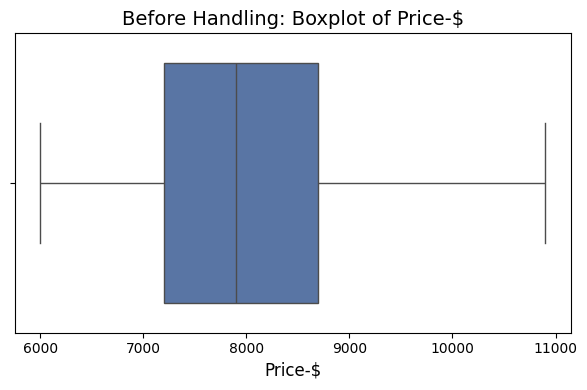

C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\2417172501.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="deep")


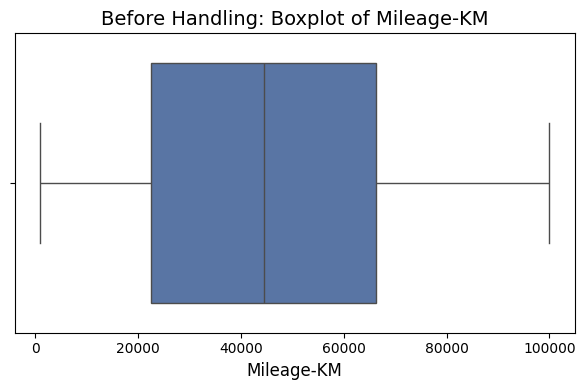

C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\2417172501.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="deep")


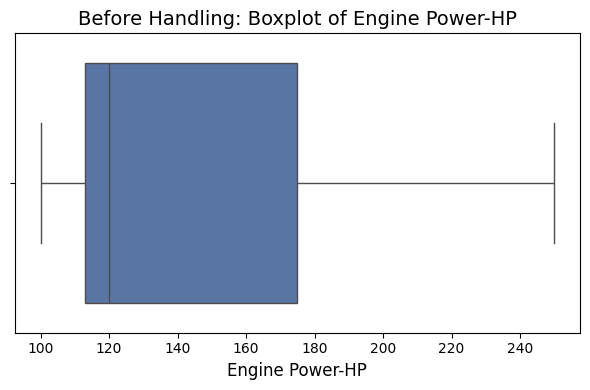

C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\2417172501.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="deep")


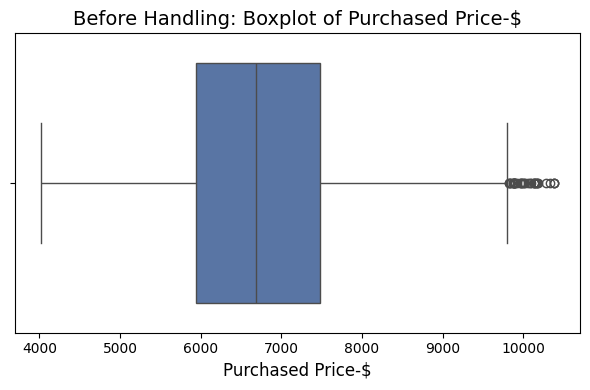

In [10]:
# 1. Define the continuous features to inspect
cont_feats = ['Price-$', 'Mileage-KM', 'Engine Power-HP', 'Purchased Price-$']

# 2. Boxplots BEFORE handling outliers (each in its own figure)
for col in cont_feats:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], palette="deep")
    plt.title(f'Before Handling: Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

In [11]:
# 3. Manual Z-score method: flag |z| > 3
#    (avoids nan_policy argument issues)
z_scores = (df[cont_feats] - df[cont_feats].mean()) / df[cont_feats].std(ddof=0)
z_scores = z_scores.abs()
print("Z-score outlier counts (|z| > 3):")
for col in cont_feats:
    cnt = (z_scores[col] > 3).sum()
    print(f"  • {col}: {cnt} outliers")

Z-score outlier counts (|z| > 3):
  • Price-$: 0 outliers
  • Mileage-KM: 0 outliers
  • Engine Power-HP: 0 outliers
  • Purchased Price-$: 16 outliers


In [12]:
# 4. IQR method: compute bounds & count outliers
iqr_bounds = {}
print("\nIQR bounds & outlier counts:")
for col in cont_feats:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    cnt = ((df[col] < lower) | (df[col] > upper)).sum()
    iqr_bounds[col] = (lower, upper)
    print(f"  • {col}: lower={lower:.2f}, upper={upper:.2f}, {cnt} outliers")


IQR bounds & outlier counts:
  • Price-$: lower=4950.00, upper=10950.00, 0 outliers
  • Mileage-KM: lower=-43120.75, upper=131941.25, 0 outliers
  • Engine Power-HP: lower=20.00, upper=268.00, 0 outliers
  • Purchased Price-$: lower=3621.50, upper=9797.50, 36 outliers


In [13]:
# 5. Winsorize (cap) at IQR bounds
df_out = df.copy()
for col, (lower, upper) in iqr_bounds.items():
    df_out[col] = df_out[col].clip(lower, upper)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\1587927302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_out[col], palette="deep")


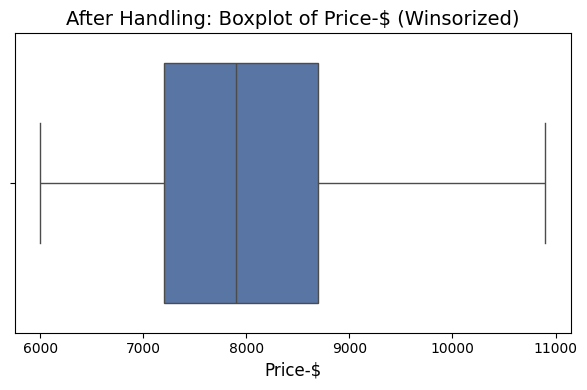

C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\1587927302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_out[col], palette="deep")


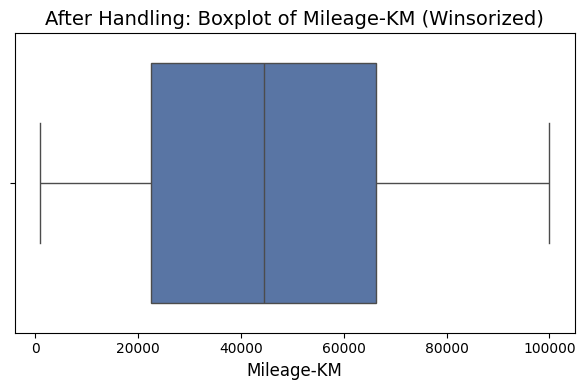

C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\1587927302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_out[col], palette="deep")


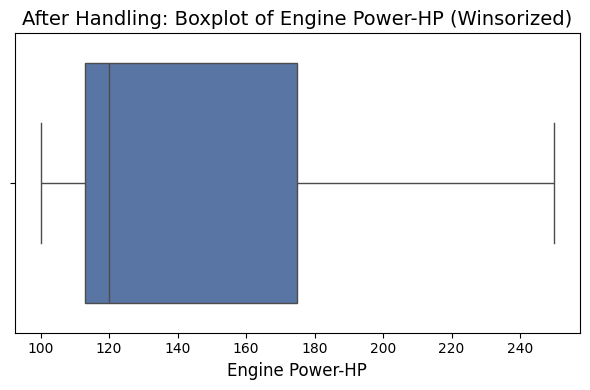

C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\1587927302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_out[col], palette="deep")


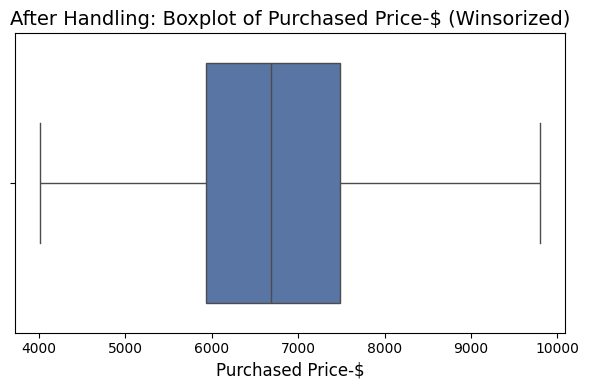

In [14]:
# 6. Boxplots AFTER winsorization (each in its own figure)
for col in cont_feats:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_out[col], palette="deep")
    plt.title(f'After Handling: Boxplot of {col} (Winsorized)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

***FINDING 02 - Summary Statistics and Distribution of Data***

In [15]:
cont_feats = ['Price-$', 'Mileage-KM', 'Engine Power-HP', 'Purchased Price-$']

# 1) Compute summary statistics for each feature
summary_stats = []
for col in cont_feats:
    s = df_out[col]
    summary_stats.append({
        'Feature':        col,
        'Mean':           s.mean(),
        'Median':         s.median(),
        'Mode':           s.mode().iloc[0],
        'Min':            s.min(),
        'Max':            s.max(),
        'Std Dev':        s.std(ddof=1),
        '25th %ile':      s.quantile(0.25),
        '50th %ile':      s.quantile(0.5),
        '75th %ile':      s.quantile(0.75),
        'Skewness':       s.skew(),
        'Kurtosis':       s.kurt()
    })

In [16]:
summary_df = pd.DataFrame(summary_stats).set_index('Feature')
pd.options.display.float_format = '{:,.2f}'.format

print("Summary Statistics & Distribution")
display(summary_df)

Summary Statistics & Distribution


,Mean,Median,Mode,Min,Max,Std Dev,25th %ile,50th %ile,75th %ile,Skewness,Kurtosis
Feature,,,,,,,,,,,
Price-$,"7,975.20","7,900.00","7,700.00","6,000.00","10,900.00","1,018.83","7,200.00","7,900.00","8,700.00",0.22,-0.42
Mileage-KM,"45,497.46","44,470.00","65,149.00","1,000.00","99,983.00","26,869.24","22,527.50","44,470.00","66,293.00",0.17,-1.00
Engine Power-HP,143.34,120.00,120.00,100.00,250.00,44.76,113.00,120.00,175.00,1.00,-0.16
Purchased Price-$,"6,719.89","6,685.00","9,797.50","4,015.00","9,797.50","1,108.28","5,937.50","6,685.00","7,481.50",0.16,-0.38


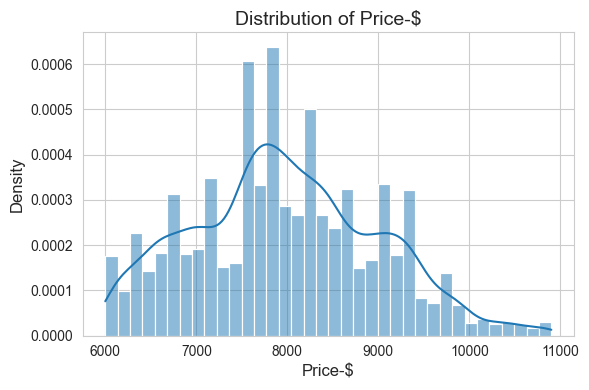

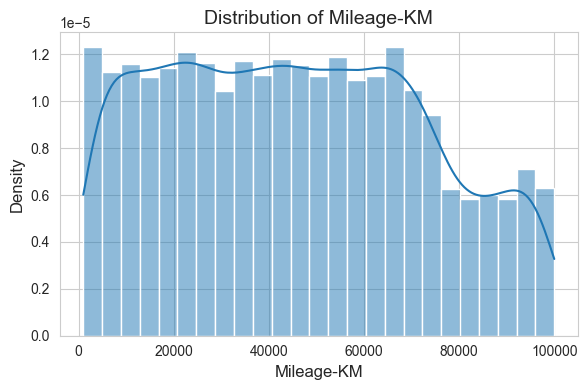

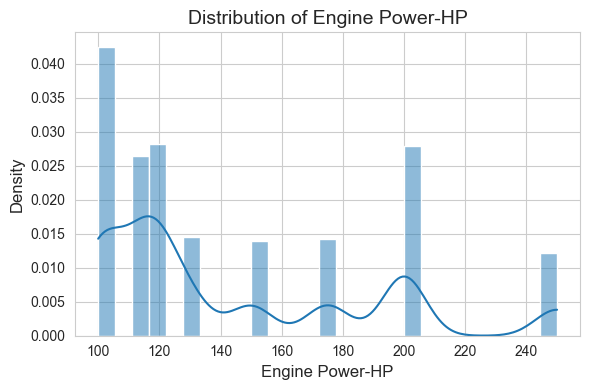

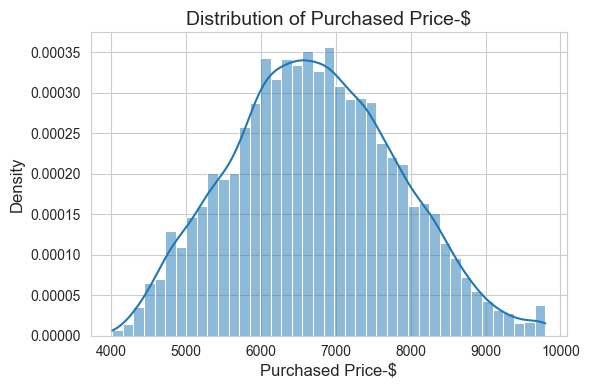

In [17]:
sns.set_style("whitegrid")

for col in cont_feats:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_out[col], kde=True, stat="density", edgecolor=None)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.tight_layout()
    plt.show()

***FINDING 03 - Correlation Between Features***

In [18]:
df_corr = df_out.copy()

# 1) Compute Pearson correlation matrix for all numeric features
numeric_cols = (
    df_corr
    .select_dtypes(include='number')
    .columns
    .drop('Manufactured Year')        # drop any non‐predictive or covariate columns
    .tolist()
)
corr_mat = df_corr[numeric_cols].corr()

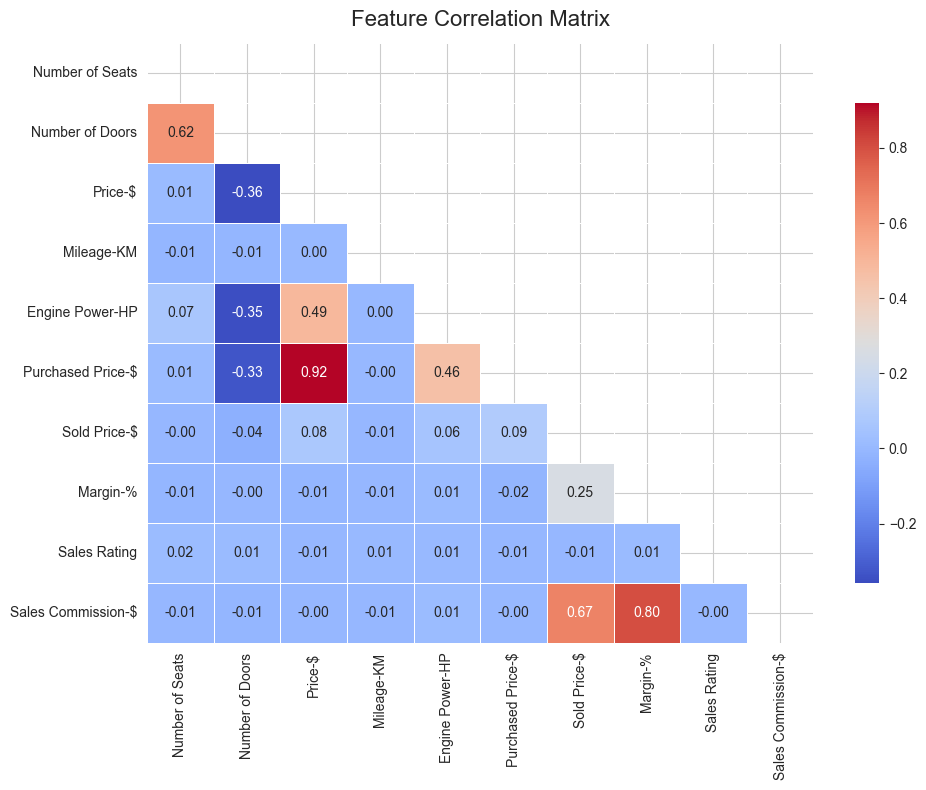

In [19]:
# A) Heatmap of all pairwise correlations
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(
    corr_mat,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'shrink': .8}
)
plt.title('Feature Correlation Matrix', fontsize=16, pad=12)
plt.tight_layout()
plt.show()

In [20]:
# — B) Identify high‐correlation pairs (|corr| > threshold)
threshold = 0.80
# unstack, drop self‐pairs, sort
pairs = (
    corr_mat
    .abs()
    .unstack()
    .reset_index()
    .rename(columns={'level_0':'Feature A','level_1':'Feature B', 0:'AbsCorr'})
)
# remove self‐pairs and duplicate pairs
pairs = pairs[pairs['Feature A'] < pairs['Feature B']]
high_corr = pairs[pairs['AbsCorr'] > threshold].sort_values('AbsCorr', ascending=False)

print(f"Feature pairs with |corr| > {threshold}:")
display(high_corr)

Feature pairs with |corr| > 0.8:


,Feature A,Feature B,AbsCorr
25,Price-$,Purchased Price-$,0.92
79,Margin-%,Sales Commission-$,0.80


Top correlations with Price-$:


Purchased Price-$    0.92
Engine Power-HP      0.49
Number of Doors      0.36
Sold Price-$         0.08
Margin-%             0.01
Number of Seats      0.01
Sales Rating         0.01
Sales Commission-$   0.00
Mileage-KM           0.00
Name: Price-$, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\1189058867.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


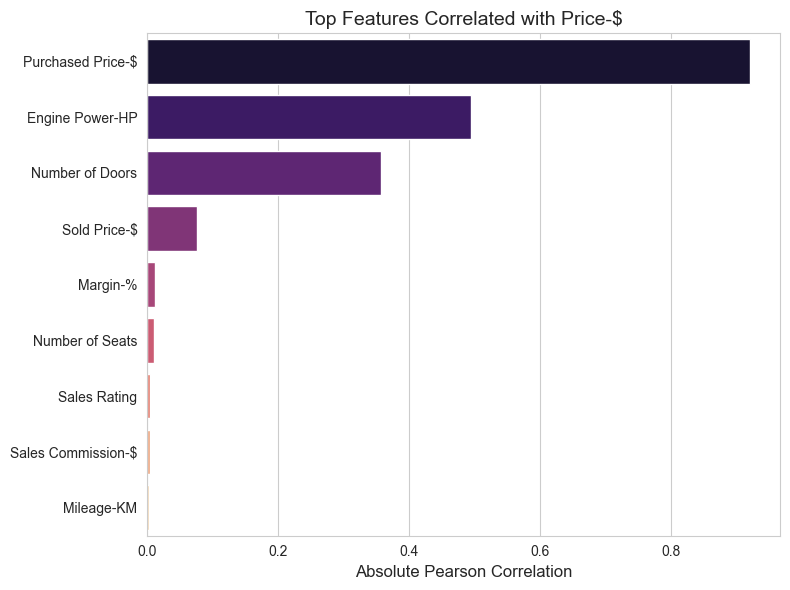

In [21]:
# C) Influence on target variable
target = 'Price-$'   # ← adjust if your true target is different
target_corr = corr_mat[target].abs().drop(target).sort_values(ascending=False)

print(f"Top correlations with {target}:")
display(target_corr.head(10))

plt.figure(figsize=(8, 6))
sns.barplot(
    x=target_corr.values, 
    y=target_corr.index, 
    palette='magma'
)
plt.title(f'Top Features Correlated with {target}', fontsize=14)
plt.xlabel('Absolute Pearson Correlation', fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.show()

***FINDING 04 - Patterns in Categorical Data***

In [22]:
# 1. List of categorical features to analyze
cat_cols = [
    'Distributor Name', 'Location',
    'Manufacturer Name', 'Car Type',
    'Color', 'Gearbox',
    'Car Sale Status', 'Sales Agent Name',
    'Feedback'
]

sns.set_style("whitegrid")


Top 5 categories for Distributor Name:
Distributor Name
Cars24    519
Carmix    505
Zupps     500
Oto       489
Olx       488
Name: count, dtype: int64 



C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\3376536458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.values, y=top5.index, palette="deep")


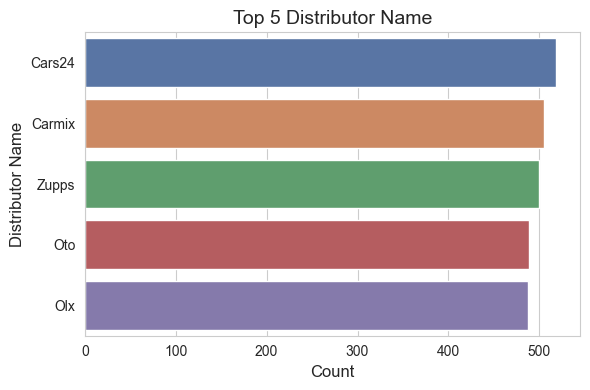

Top 5 categories for Location:
Location
North Carolina    1075
Tennessee          632
Detroit            605
Chicago            590
Denver             583
Name: count, dtype: int64 



C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\3376536458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.values, y=top5.index, palette="deep")


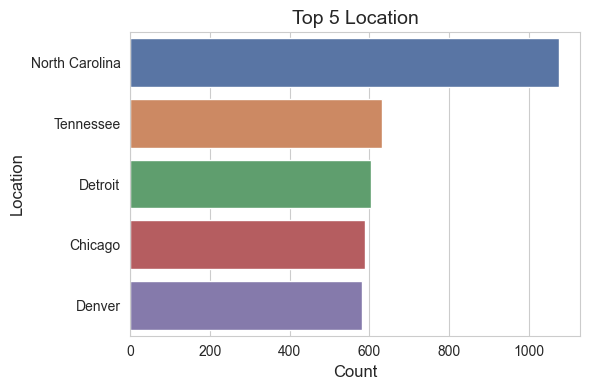

Top 5 categories for Manufacturer Name:
Manufacturer Name
Maruti      2263
Mahindra    1595
Toyota      1549
Hyundai     1516
Tata         830
Name: count, dtype: int64 



C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\3376536458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.values, y=top5.index, palette="deep")


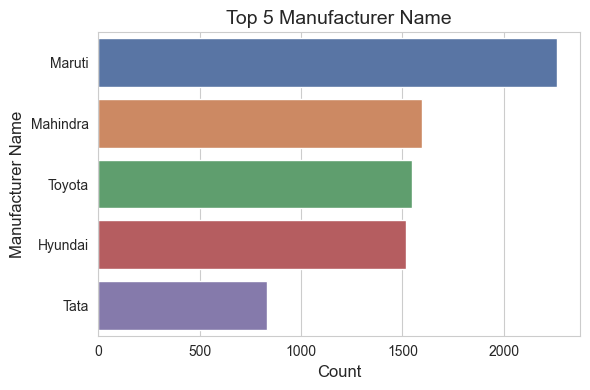

Top 5 categories for Car Type:
Car Type
SUV            3166
Hatchback      3097
Truck          1601
Sedan          1453
Convertible     680
Name: count, dtype: int64 



C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\3376536458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.values, y=top5.index, palette="deep")


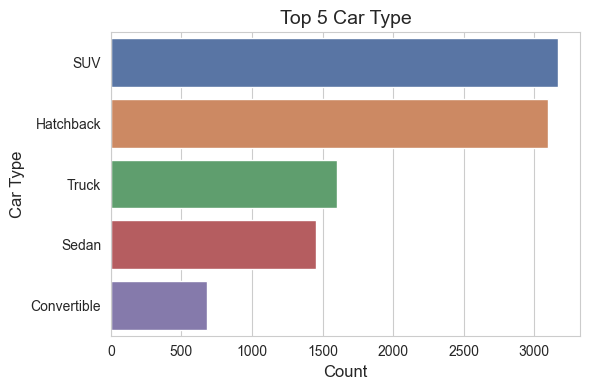

Top 5 categories for Color:
Color
Blue     2353
Black    2291
Red      2274
Gray     1629
White    1452
Name: count, dtype: int64 



C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\3376536458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.values, y=top5.index, palette="deep")


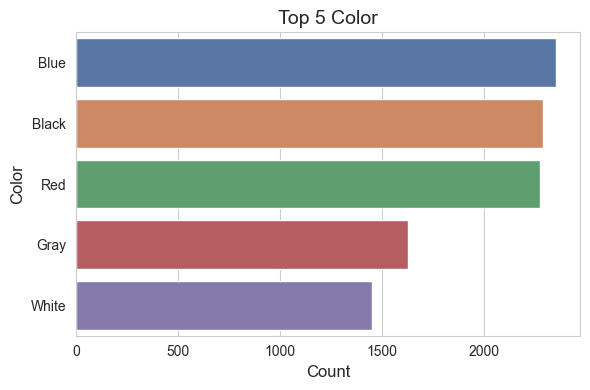

Top 5 categories for Gearbox:
Gearbox
Automatic    5092
Manual       4907
Name: count, dtype: int64 



C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\3376536458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.values, y=top5.index, palette="deep")


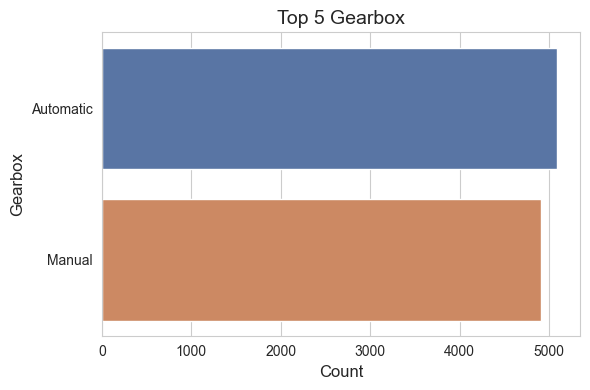

Top 5 categories for Car Sale Status:
Car Sale Status
Un Sold    7833
Sold       2166
Name: count, dtype: int64 



C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\3376536458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.values, y=top5.index, palette="deep")


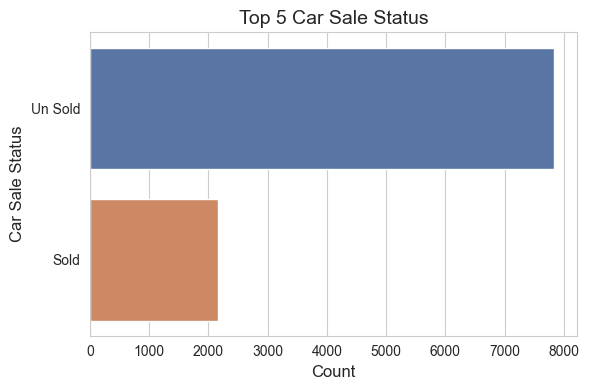

Top 5 categories for Sales Agent Name:
Sales Agent Name
Krishna     410
Aditya      401
Bhavani     389
Hariom      388
Shailaja    386
Name: count, dtype: int64 



C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\3376536458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.values, y=top5.index, palette="deep")


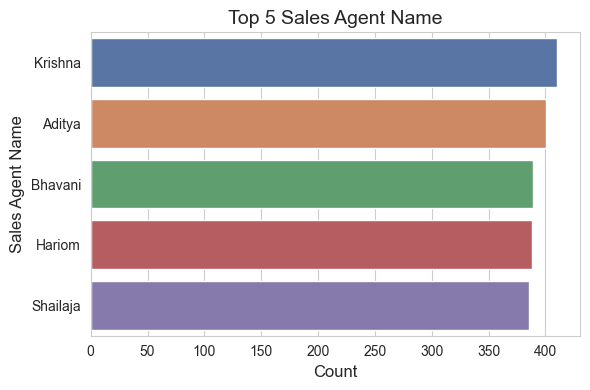

Top 5 categories for Feedback:
Feedback
Excellent    4117
Good         2940
Average      2009
Poor          925
Unknown         8
Name: count, dtype: int64 



C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\3376536458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.values, y=top5.index, palette="deep")


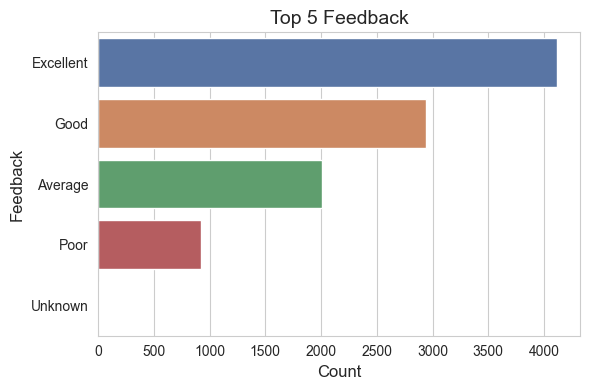

In [23]:
# 2. Top-5 category frequencies and barplots
for col in cat_cols:
    top5 = df_out[col].value_counts().nlargest(5)
    print(f"Top 5 categories for {col}:")
    print(top5, "\n")
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x=top5.values, y=top5.index, palette="deep")
    plt.title(f'Top 5 {col}', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\3844666574.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Price-$', data=df_out, order=order, palette="deep")


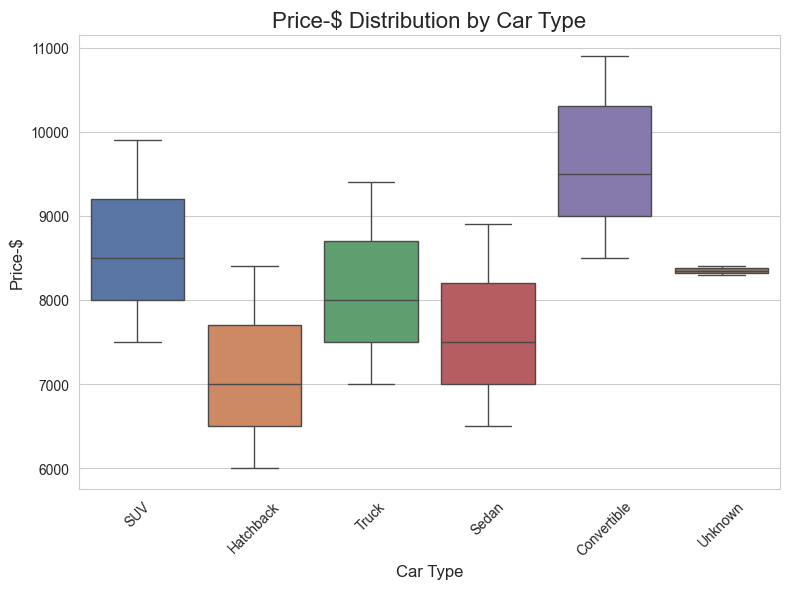

In [24]:
# 3. Impact of a categorical feature on Price-$ via boxplot
feature = 'Car Type'   # change this to any other categorical column as needed
plt.figure(figsize=(8, 6))
order = df_out[feature].value_counts().index
sns.boxplot(x=feature, y='Price-$', data=df_out, order=order, palette="deep")
plt.title(f'Price-$ Distribution by {feature}', fontsize=16)
plt.xlabel(feature, fontsize=12)
plt.ylabel('Price-$', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mean Price-$ by Car Type:
Car Type
Convertible   9,630.44
SUV           8,587.87
Unknown       8,350.00
Truck         8,092.32
Sedan         7,590.43
Hatchback     7,105.17
Name: Price-$, dtype: float64 



C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\823888561.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_price.values, y=mean_price.index, palette="magma")


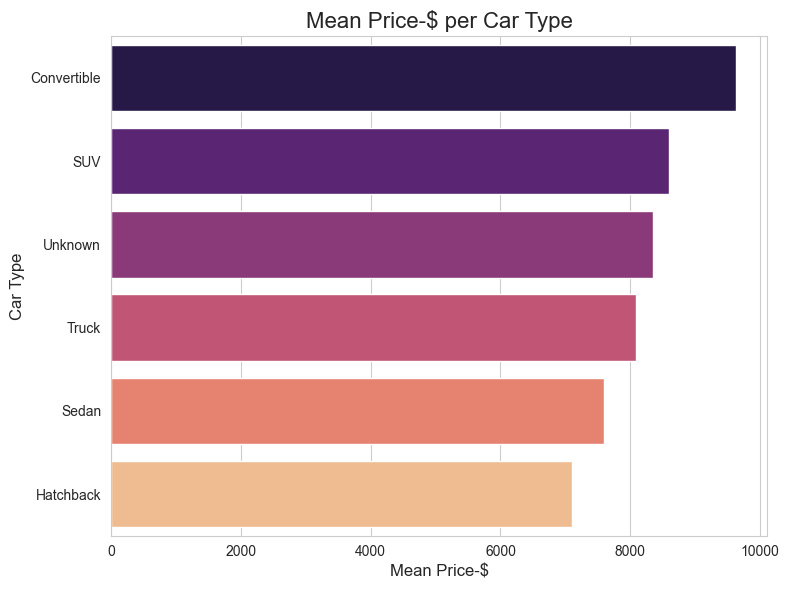

In [25]:
# 4. Mean Price-$ per category and barplot
mean_price = df_out.groupby(feature)['Price-$'].mean().sort_values(ascending=False)
print(f"Mean Price-$ by {feature}:")
print(mean_price, "\n")

plt.figure(figsize=(8, 6))
sns.barplot(x=mean_price.values, y=mean_price.index, palette="magma")
plt.title(f'Mean Price-$ per {feature}', fontsize=16)
plt.xlabel('Mean Price-$', fontsize=12)
plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

***FINDING 06 - FEATURE ENGINEERING AND NEW INSIGHTS***

In [27]:
df = df_out.copy()

# 1. BINNING: Convert a continuous variable into categories
#    Example: Bin Engine Power into Low/Medium/High buckets
power_bins = [0, 120, 180, np.inf]
power_labels = ['Low Power','Mid Power','High Power']
df['PowerCategory'] = pd.cut(df['Engine Power-HP'],
                             bins=power_bins,
                             labels=power_labels,
                             right=False)

In [28]:
df['TotalMargin_$'] = df['Sold Price-$'] - df['Purchased Price-$']
df['ROI_%'] = (df['TotalMargin_$'] / df['Purchased Price-$']) * 100

#    Another example: Age of Car = Current Year – Manufactured Year
current_year = pd.Timestamp.now().year
df['CarAge'] = current_year - df['Manufactured Year']

In [29]:
df['Purchased Date'] = pd.to_datetime(df['Purchased Date'])
df['PurchaseYear']  = df['Purchased Date'].dt.year
df['PurchaseMonth'] = df['Purchased Date'].dt.month
df['PurchaseDay']   = df['Purchased Date'].dt.day
df['PurchaseHour']  = df['Purchased Date'].dt.hour
df['PurchaseWeekday'] = df['Purchased Date'].dt.day_name()

In [30]:
df['PurchasePeriod'] = df['Purchased Date'].dt.to_period('M')

# Display the newly engineered features
print(df[['Engine Power-HP', 'PowerCategory',
          'Purchased Price-$','Sold Price-$','TotalMargin_$','ROI_%',
          'Manufactured Year','CarAge',
          'Purchased Date','PurchaseYear','PurchaseMonth','PurchaseDay',
          'PurchaseHour','PurchaseWeekday','PurchasePeriod']].head())

   Engine Power-HP PowerCategory  Purchased Price-$  Sold Price-$  \
0              200    High Power           8,296.00          0.00   
1              113     Low Power           6,685.00      4,770.00   
2              120     Mid Power           8,430.00          0.00   
3              250    High Power           6,919.00      7,942.00   
4              100     Low Power           6,864.00          0.00   

   TotalMargin_$   ROI_%  Manufactured Year  CarAge Purchased Date  \
0      -8,296.00 -100.00               2021       4     2022-10-26   
1      -1,915.00  -28.65               2018       7     2017-08-25   
2      -8,430.00 -100.00               2016       9     2018-06-13   
3       1,023.00   14.79               2021       4     2023-05-14   
4      -6,864.00 -100.00               2019       6     2022-08-24   

   PurchaseYear  PurchaseMonth  PurchaseDay  PurchaseHour PurchaseWeekday  \
0          2022             10           26             0       Wednesday   
1         

***FINDING 08 - TIME SERIES ANALYSIS***

In [31]:
ts = df.set_index('Purchased Date').sort_index()

# 2) Resample to daily / weekly / monthly frequency
daily = ts['Price-$'].resample('D').sum()
weekly = ts['Price-$'].resample('W').sum()
monthly = ts['Price-$'].resample('M').sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8860\1157578197.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = ts['Price-$'].resample('M').sum()


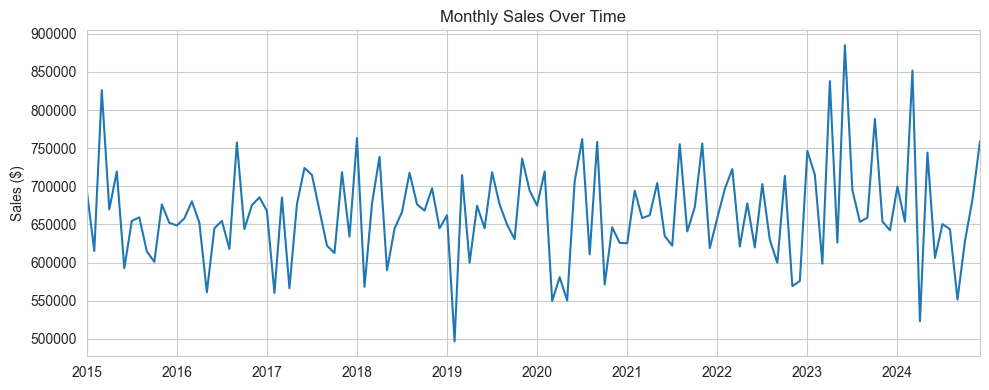

In [32]:
plt.figure(figsize=(10,4))
monthly.plot()
plt.title('Monthly Sales Over Time')
plt.ylabel('Sales ($)')
plt.xlabel('')
plt.tight_layout()
plt.show()


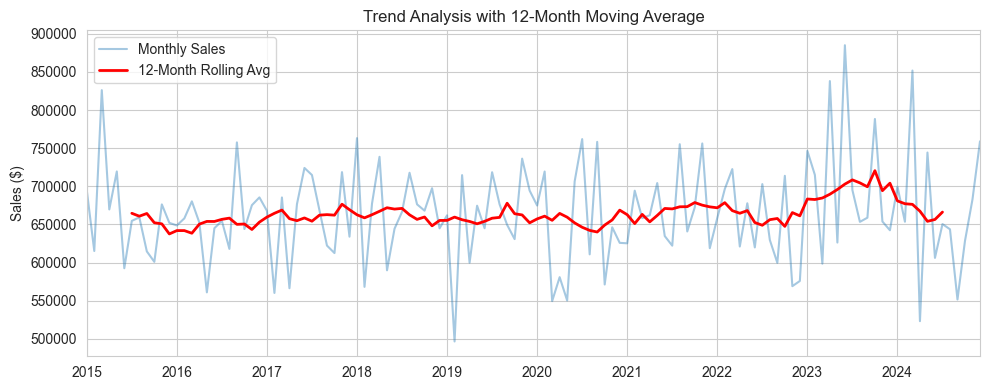

In [33]:
rolling_12m = monthly.rolling(window=12, center=True).mean()
plt.figure(figsize=(10,4))
monthly.plot(alpha=0.4, label='Monthly Sales')
rolling_12m.plot(color='red', linewidth=2, label='12-Month Rolling Avg')
plt.legend()
plt.title('Trend Analysis with 12-Month Moving Average')
plt.ylabel('Sales ($)')
plt.xlabel('')
plt.tight_layout()
plt.show()

***FINDING 09 - CLUSTERING TECHNIQUES***

In [38]:
df = df_out.copy()
if 'Customer ID' in df.columns:
    customer_col = 'Customer ID'
elif 'Sales Agent Name' in df.columns:
    customer_col = 'Sales Agent Name'
elif 'Distributor Name' in df.columns:
    customer_col = 'Distributor Name'
else:
    raise KeyError("No customer‐key column found. Please set customer_col manually.")

In [39]:
df['Purchased Date'] = pd.to_datetime(df['Purchased Date'])
snapshot = df['Purchased Date'].max() + timedelta(days=1)

rfm = (
    df
    .groupby(customer_col)
    .agg(
        Recency=('Purchased Date', lambda x: (snapshot - x.max()).days),
        Frequency=(customer_col, 'count'),
        Monetary=('Price-$', 'sum')
    )
)

In [40]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


In [41]:
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(rfm_scaled)
    wcss.append(km.inertia_)

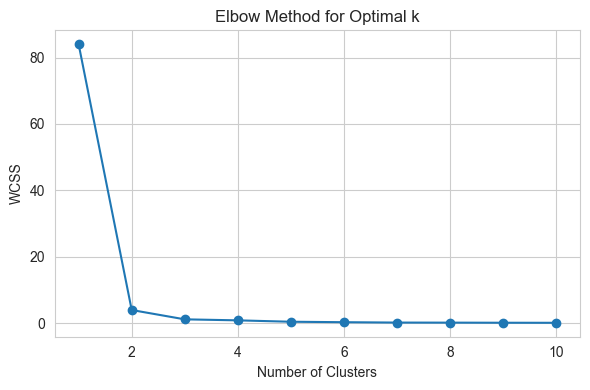

In [42]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.tight_layout()
plt.show()


In [43]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
rfm['Segment'] = kmeans.fit_predict(rfm_scaled)

# 5. Profile segments
profile = (
    rfm
    .reset_index()
    .groupby('Segment')
    .agg(
        Recency   = ('Recency',   'mean'),
        Frequency = ('Frequency', 'mean'),
        Monetary  = ('Monetary',  'mean'),
        Count     = (customer_col, 'count')
    )
)
print(profile)


         Recency  Frequency     Monetary  Count
Segment                                        
0           8.67     384.60 3,068,846.67     15
1       1,654.00       1.00     7,600.00      1
2          14.50     341.25 2,707,050.00      4
3          11.50     358.00 2,859,437.50      8


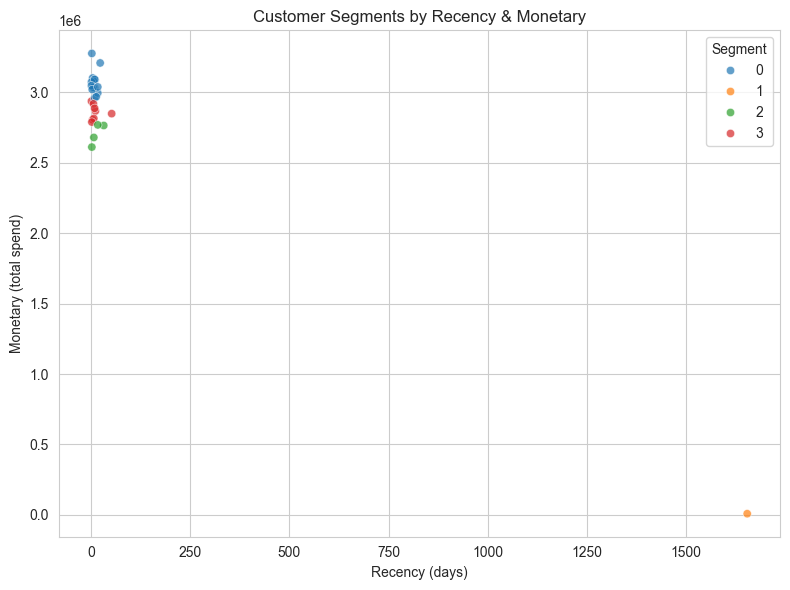

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=rfm.reset_index(),
    x='Recency', y='Monetary', hue='Segment',
    palette='tab10', alpha=0.7
)
plt.title('Customer Segments by Recency & Monetary')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary (total spend)')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

***FINDING 10 - ANOMALY DETECTION***

In [53]:
df = df_out.copy()

# 1) Z-score method for univariate anomaly detection on numeric features
numeric_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
z_thresh = 3.0

# flag any row where any feature’s |z| > threshold
df['Z_Anomaly'] = (z_scores > z_thresh).any(axis=1)

print("Z-score anomalies:", df['Z_Anomaly'].mean())

Z-score anomalies: 0.0538053805380538


In [54]:
iso = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
df['IF_Score'] = iso.fit_predict(df[numeric_cols])
df['IF_Anomaly'] = df['IF_Score'] == -1

print("Isolation Forest anomalies:", df['IF_Anomaly'].mean())


Isolation Forest anomalies: 0.35193519351935193


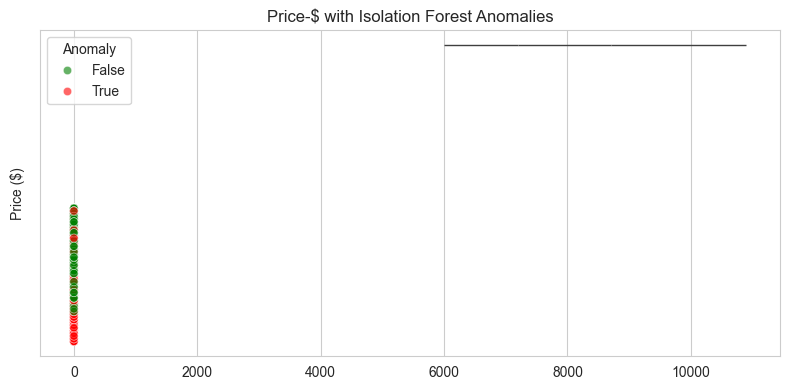

In [55]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Price-$'])
sns.scatterplot(
    x=np.zeros(len(df)),
    y=df['Price-$'],
    hue=df['IF_Anomaly'],
    palette={False:'green', True:'red'},
    legend='full',
    alpha=0.6
)
plt.title('Price-$ with Isolation Forest Anomalies')
plt.xlabel('')
plt.ylabel('Price ($)')
plt.legend(title='Anomaly')
plt.tight_layout()
plt.show()

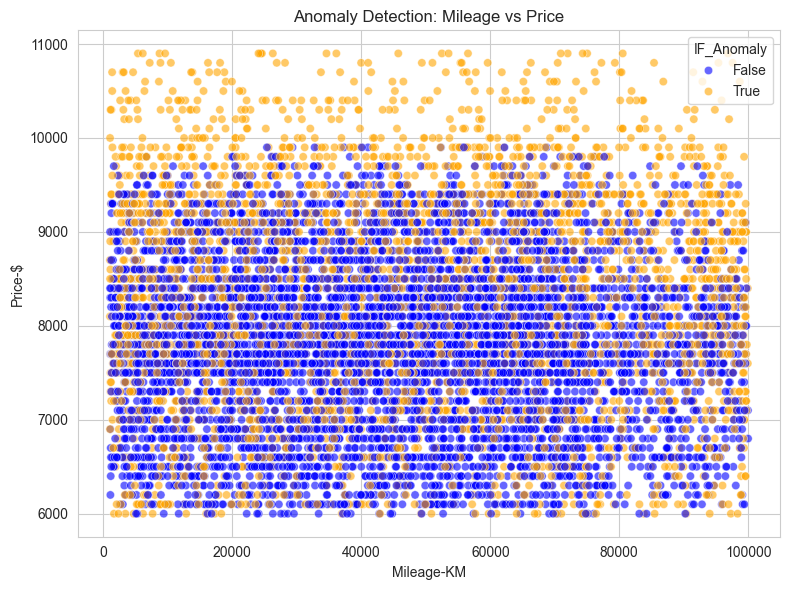

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Mileage-KM', y='Price-$',
    data=df,
    hue='IF_Anomaly',
    palette={False:'blue', True:'orange'},
    alpha=0.6
)
plt.title('Anomaly Detection: Mileage vs Price')
plt.tight_layout()
plt.show()